In [356]:
# Importing the pandas library, which provides data structures and data analysis tools
# This library is commonly used for handling and analyzing data in Python
import pandas as pd

# Importing the numpy library, which supports large, multi-dimensional arrays and matrices
# It also provides a collection of mathematical functions to operate on these arrays
import numpy as np

# Importing matplotlib.pyplot, a plotting library for the Python programming language
# This module is used for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt

# Importing seaborn, a library for making statistical graphics in Python
# It is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns


# Data Cleaning

In [357]:
# Read in the Algerian forest fires dataset from a CSV file
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

# Strip any leading or trailing whitespace from the column names
# and convert them to upper case
df.columns = df.columns.str.strip().str.upper()

# Print out the column names of the dataframe
print(df.columns)


Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES'],
      dtype='object')


In [358]:
# The purpose of this code is to display the first few records of the dataframe
# so that we can visually inspect the data and get a sense of its structure
# and content. The head() function is a convenient way to do this since it
# returns the first n rows of the dataframe, and if we don't specify n, it
# defaults to 5. This is often a good number to start with because it gives
# us a decent sense of the data without overwhelming us with too much info.
#
# The call to df.head() will return the first 5 rows of the dataframe, and
# since we're not assigning the result to anything, the output will be
# displayed in the console.
df.head()



,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [359]:
# df.info() is a function that prints out a concise summary of the dataframe.
# This summary includes the index dtype and column dtypes, non-nullable counts
# and memory usage. This is useful for quickly understanding what is in the dataframe.
# For example, it will show if there are any columns with missing values.
# This is also useful for debugging, as it will show the data types of the columns,
# which can be used to identify potential issues.
# In this case, I am using it to print out a summary of the dataframe df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DAY          246 non-null    object
 1   MONTH        245 non-null    object
 2   YEAR         245 non-null    object
 3   TEMPERATURE  245 non-null    object
 4   RH           245 non-null    object
 5   WS           245 non-null    object
 6   RAIN         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  CLASSES      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [360]:
# Assign the value 0 to the 'REGION' column for all rows with indices from 0 to 122 (inclusive).
df.loc[:122, 'REGION'] = 0

# Assign the value 1 to the 'REGION' column for all rows with indices from 122 onwards.
df.loc[122:, 'REGION'] = 1

In [361]:
# The data set has a couple of rows with missing values. We'll
# remove them before doing anything else. The rows in question
# are indexed by 122 and 123, so we can just drop them.
# The `inplace=True` argument means that we modify the original
# DataFrame instead of having to assign the result to a new
# variable.
df.drop(index=[122,123], inplace= True)


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          244 non-null    object 
 1   MONTH        244 non-null    object 
 2   YEAR         244 non-null    object 
 3   TEMPERATURE  244 non-null    object 
 4   RH           244 non-null    object 
 5   WS           244 non-null    object 
 6   RAIN         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  CLASSES      243 non-null    object 
 14  REGION       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


In [363]:
df.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES', 'REGION'],
      dtype='object')

In [364]:
# We're going to convert the DAY, MONTH, YEAR, TEMPERATURE, RH, and WS columns from whatever data type they are
# (probably strings) to integers. This is because they are all numeric and we want to make sure they're in a
# numeric data type for any calculations we do.

# We're using the .astype() method to do this. This method takes one argument, which is the data type we want to
# convert to. In this case, we're passing in int, which means we want to convert the columns to integers.

# We're assigning the result of this operation back to the same columns, so that the data type of those columns
# will be updated. This is why we have "df[['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS']]" on the left hand
# side of the equals sign - it's saying "take the columns DAY, MONTH, YEAR, TEMPERATURE, RH, and WS from the
# dataframe df, and assign the result of the following operation to those columns".

# The .astype() method is called on the result of selecting those columns from the dataframe, because we want
# to apply the .astype() method to the entire selection of columns, not just to one column at a time. If we
# wanted to apply it one column at a time, we would have to do something like "df['DAY'] = df['DAY'].astype(int)",
# but since we want to apply it to all six columns at once, we can just pass in the entire selection of columns
# to the .astype() method.
df[['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS']] = df[['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS']].astype(int)


In [365]:
# This list comprehension is creating a list of all the columns in df
# where the data type is an object (i.e. a string, rather than a number)
# This is necessary because object columns can't be used in sklearn
# by default, so we need to either drop them, or convert them into
# a numeric format (e.g. one-hot encoding)
object_col = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print out the list of columns we've identified, so we can see
# which columns are object columns
print(object_col)


['RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES']


In [366]:
# convert the following columns to float type
# because they are numeric and this is easier to work with
df['RAIN']=df['RAIN'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

# FWI has a single entry that says "fire   " which is not a number
# so replace it with NaN so that we can convert the rest of the column to float
df.loc[df['FWI'].isin(['fire   ']), 'FWI'] = np.nan
df['FWI']=df['FWI'].astype(float)


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          244 non-null    int32  
 1   MONTH        244 non-null    int32  
 2   YEAR         244 non-null    int32  
 3   TEMPERATURE  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   WS           244 non-null    int32  
 6   RAIN         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  CLASSES      243 non-null    object 
 14  REGION       244 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 24.8+ KB


In [368]:
# Drop the 167th row (index 167) from the dataframe df
# inplace=True means that we modify the original dataframe
# instead of creating a new one.
df.drop(index=167,inplace=True)


In [369]:
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [370]:
# Remove leading and trailing whitespace from the CLASSES column
# This is useful for visual inspection of the data and for some algorithms
# that don't like whitespace in their inputs. Note that this is an in-place
# operation, meaning that the original DataFrame is modified.
df['CLASSES']=df['CLASSES'].str.strip()


In [371]:
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [372]:
df.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES', 'REGION'],
      dtype='object')

# Exploratory Data Analysis

In [373]:
# Define a list of numeric feature names, which are continuous variables used for analysis
numeric_features = [
    'TEMPERATURE',  # Temperature measurement
    'RH',           # Relative Humidity
    'WS',           # Wind Speed
    'RAIN',         # Rainfall amount
    'FFMC',         # Fine Fuel Moisture Code
    'DMC',          # Duff Moisture Code
    'DC',           # Drought Code
    'ISI',          # Initial Spread Index
    'BUI',          # Buildup Index
    'FWI'           # Fire Weather Index
]

# Define a list of categorical feature names, which are discrete variables used for classification
categorical_features = [
    'CLASSES'       # Classification of data points (e.g., fire or no fire)
]
numeric_features = ['TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
categorical_features = ['CLASSES']


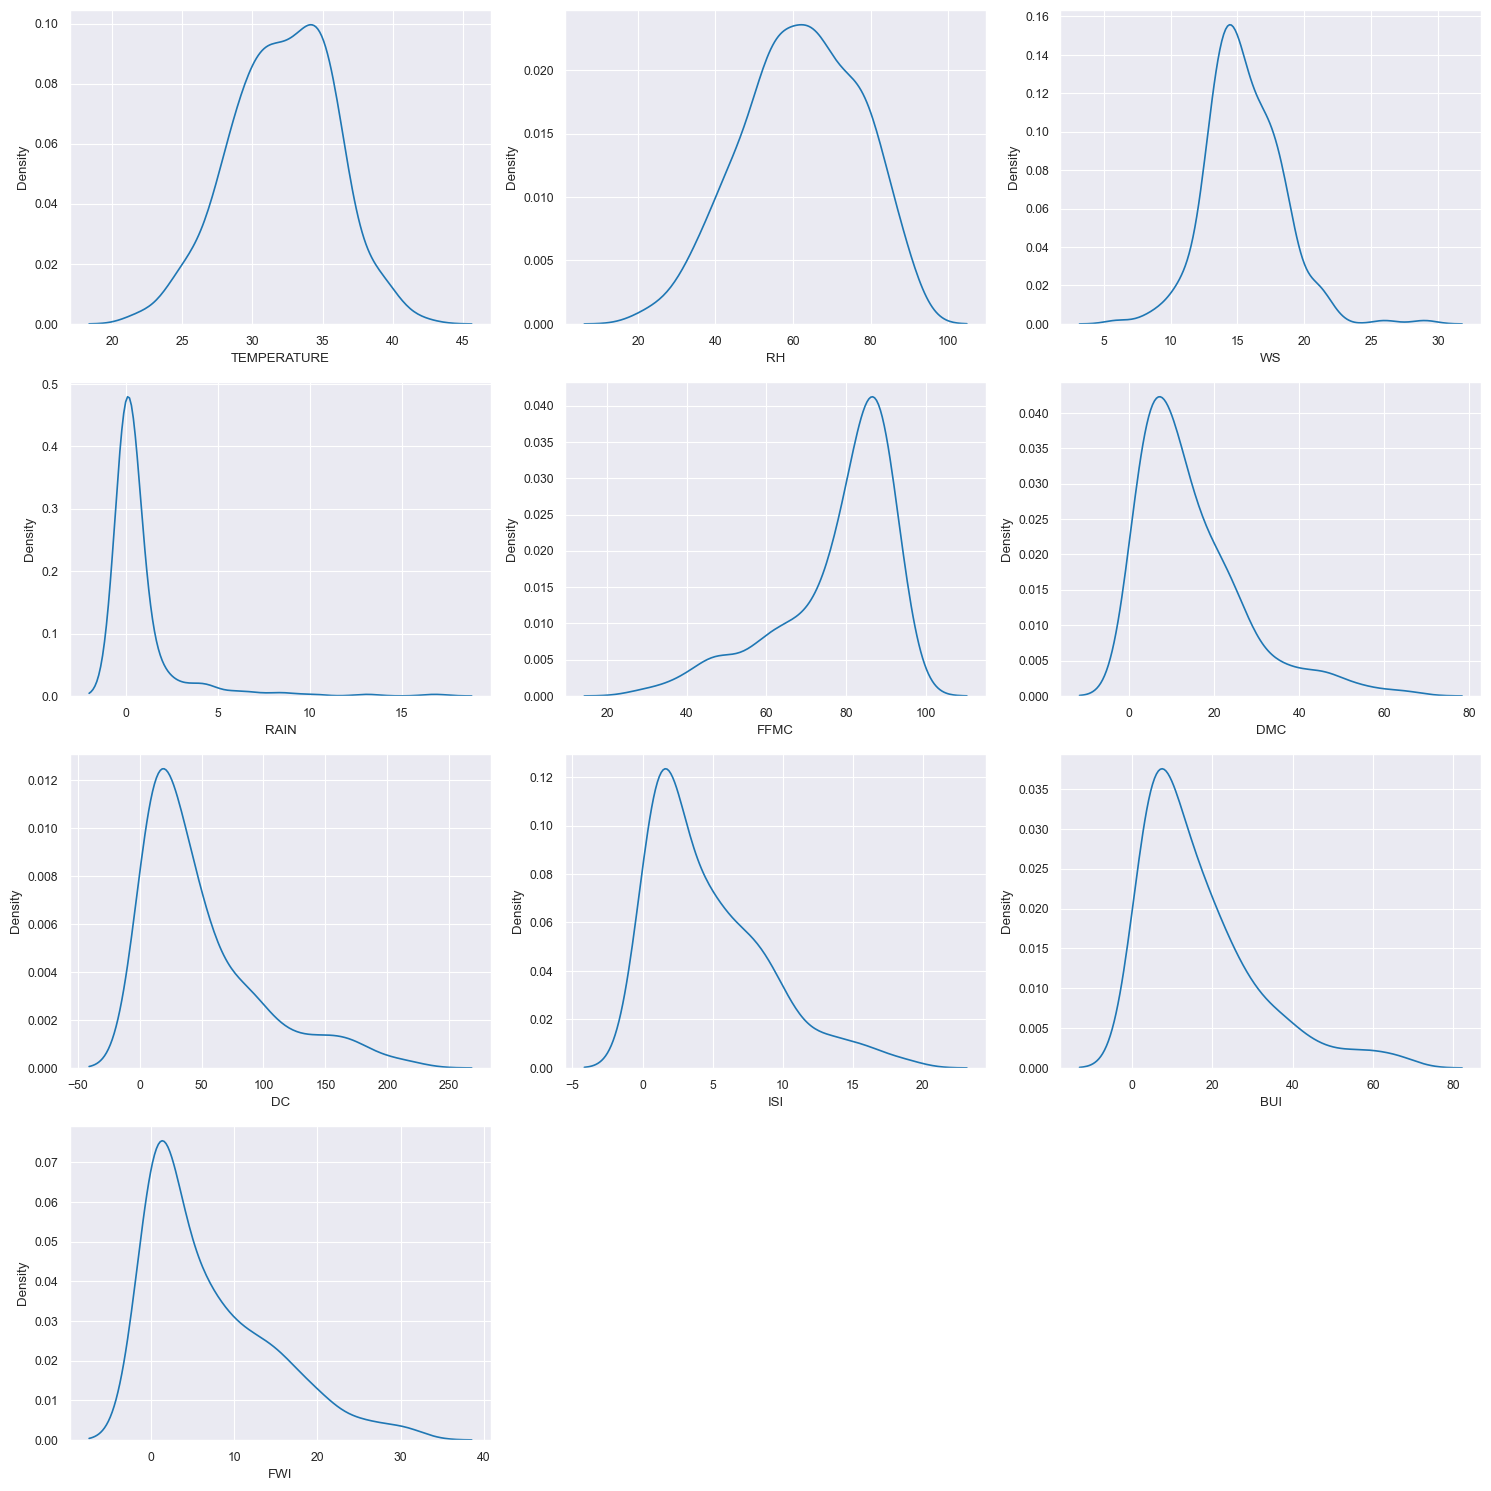

In [374]:
# Create a new figure with a size of 15x15 inches
plt.figure(figsize=(15,15))

# Set the style of the plot to "darkgrid" which is a dark background with white grid lines
sns.set_style("darkgrid")

# Set the context of the plot to "paper" which is a good setting for publication quality plots
# The font scale is set to 1, which means the font size will be the same as the default
sns.set_context('paper', font_scale=1)

# Loop over all numeric features in the dataframe
for i in range(len(numeric_features)):
    # Create a subplot for each numeric feature
    plt.subplot(4,3,i+1)

    # Plot a kernel density estimate of the data for this feature
    # The data is taken from the dataframe df and the column is specified by numeric_features[i]
    sns.kdeplot(data=df[numeric_features[i]])

    # Make sure the plot is nicely arranged and doesn't overlap with other plots
    plt.tight_layout()

C:\Users\pandh\AppData\Local\Temp\ipykernel_16748\4245917156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['CLASSES'], color='red', palette='hls')


<Axes: xlabel='count', ylabel='CLASSES'>

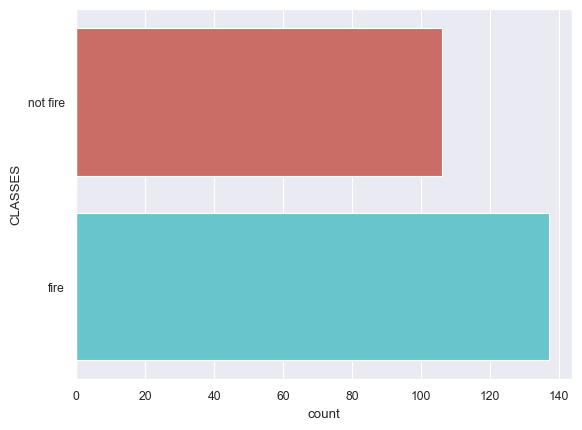

In [375]:
# This line of code will generate a count plot from the 'CLASSES' column in the dataframe 'df'.
# The count plot will show the number of each class in the 'CLASSES' column.
# The color of the bars will be red, and the palette will be 'hls'.
# The 'hls' palette is a perceptually uniform color space that is commonly used for visualizations.
# The 'color' parameter is used to specify the color of the bars in the count plot.
# The 'palette' parameter is used to specify the color palette to use for the count plot.
sns.countplot(df['CLASSES'], color='red', palette='hls')


<Axes: >

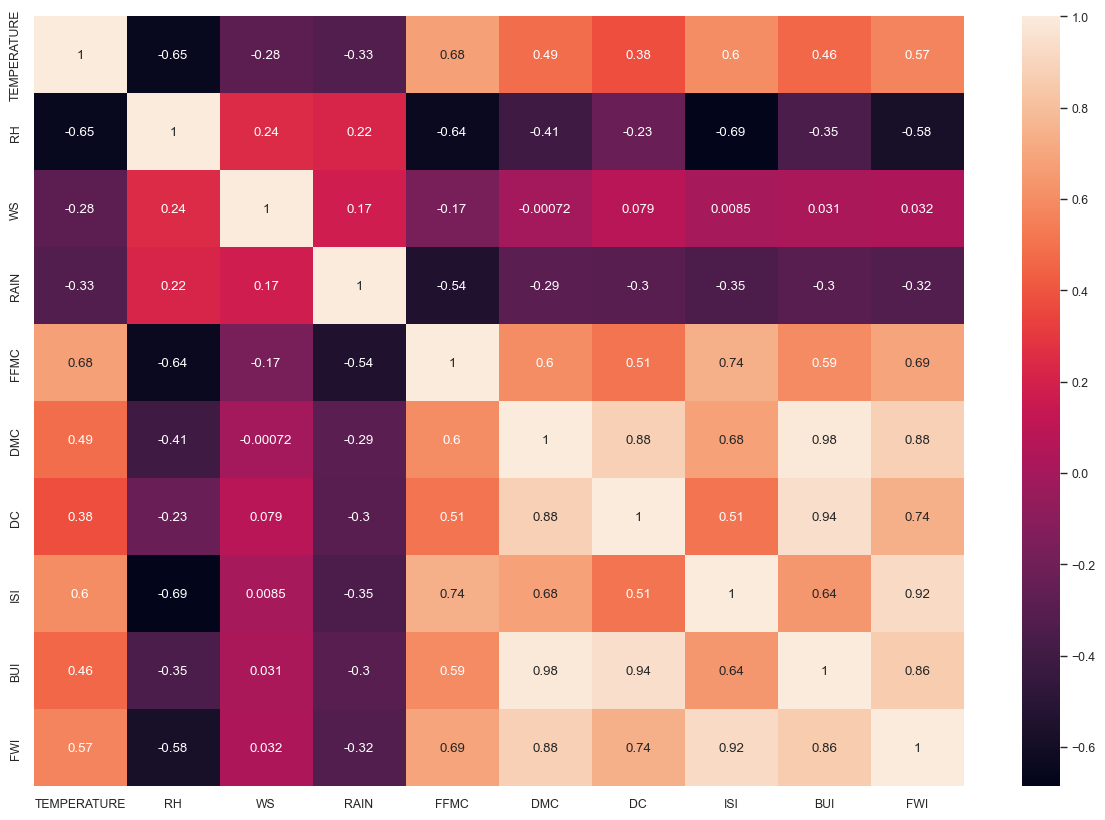

In [376]:
# Create a new figure with a specified size
# The figsize parameter is a tuple of two values, the width and height of the figure in inches
# The default is (6.4, 4.8) inches
plt.figure(figsize=(15,10))

# Use seaborn to create a heatmap of the correlation matrix
# The heatmap function takes a matrix as input and creates an image where the color of each cell
# corresponds to the value in the matrix
# The annot parameter is a boolean that determines whether to add numerical annotations to each cell
# The default is False
sns.heatmap(df[numeric_features].corr(), annot=True)

# Feature Selection

In [377]:
def correlation(dataset, threshold):
    """
    Compute the correlation between all columns in a dataset
    and return a set of column names that have a correlation
    above the given threshold.
    """
    # Initialize an empty set to store the column names
    correlated_columns = set()

    # Compute the correlation matrix
    corr_matrix = dataset[numeric_features].corr()

    # Iterate over the upper triangle of the correlation matrix
def correlation(dataset, threshold):
    correlated_columns = set()
    corr_matrix = df[numeric_features].corr()
    for i in range(len(numeric_features)):
        for j in range(i):
            # If the correlation is greater than the threshold, add
            # the column name to the set
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_columns.add(corr_matrix.columns[i])
    # Return the set of column names
    return correlated_columns


print(correlation(df, 0.85))
    

{'DC', 'FWI', 'BUI'}


In [378]:
# Drop the columns 'BUI' and 'DC' from the DataFrame 'df'
# The 'inplace=True' parameter ensures that the operation is performed on the original DataFrame
df.drop(columns=['BUI', 'DC'], inplace=True)

In [379]:
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,ISI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,1.3,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,1.0,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,0.3,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,0.0,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,1.2,0.5,not fire,0.0


In [380]:
# Drop the columns 'DAY', 'MONTH', and 'YEAR' from the DataFrame 'df'
# The 'inplace=True' parameter ensures that the operation is performed
# directly on the original DataFrame, without needing to reassign it.
df.drop(columns=['DAY', 'MONTH', 'YEAR'], inplace=True)


In [381]:
df.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,ISI,FWI,CLASSES,REGION
0,29,57,18,0.0,65.7,3.4,1.3,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,not fire,0.0


In [382]:
df.loc[df['CLASSES']=='not fire', 'CLASSES'] = 0
df.loc[df['CLASSES']=='fire', 'CLASSES'] = 1

In [383]:
df.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,ISI,FWI,CLASSES,REGION
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0.0


# Model Training

In [384]:
# We are defining the independent and dependent variables
# The independent variables are the features we are using to predict the target
# The dependent variable is the target we are trying to predict

# The independent variables are the following columns from the dataframe
# - TEMPERATURE: the temperature of the environment
# - RH: the relative humidity of the environment
# - WS: the wind speed of the environment
# - RAIN: the amount of rainfall of the environment
# - FFMC: the Fine Fuel Moisture Code of the environment
# - DMC: the Duff Moisture Code of the environment
# - ISI: the Initial Spread Index of the environment
x = df[['TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'ISI','REGION','CLASSES']]

# The dependent variable is the FWI (Fire Weather Index) of the environment
# This is the target we are trying to predict
y = df['FWI']


In [385]:
# This code splits our data into training and testing sets.
# The training set is used to train a machine learning model, and the testing set is used to evaluate how well the model performs on unseen data.
# The "test_size" parameter determines how much of the data is used for the test set. In this case, we're using 25% of the data for the test set.
# The "random_state" parameter is used to ensure that the split is reproducible. If we don't set this, we might get different results every time we run the code.
# The "train_test_split" function returns four values: the training set for the independent variable, the test set for the independent variable, the training set for the dependent variable, and the test set for the dependent variable.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=5)


In [386]:
# We want to standardize our features by removing the mean and scaling to unit variance.
# This is important because many machine learning algorithms assume that the data is normally distributed.
# Also, some algorithms, such as PCA, are sensitive to the scale of the data, so we want to make sure that all features are on the same scale.
# StandardScaler is a class from the sklearn library that can do this for us.

# We create an instance of the StandardScaler class, and fit it to the x_train data.
# The fit method takes the data as input and computes the mean and standard deviation of each feature.
# The transform method takes the data as input and subtracts the mean and divides by the standard deviation for each feature, so that the mean is zero and the standard deviation is one.
# We fit the scaler to the x_train data, and then use it to transform the x_train and x_test data.
# This way, the x_train and x_test data are standardized, and can be used as input for any machine learning algorithm that requires standardized data.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

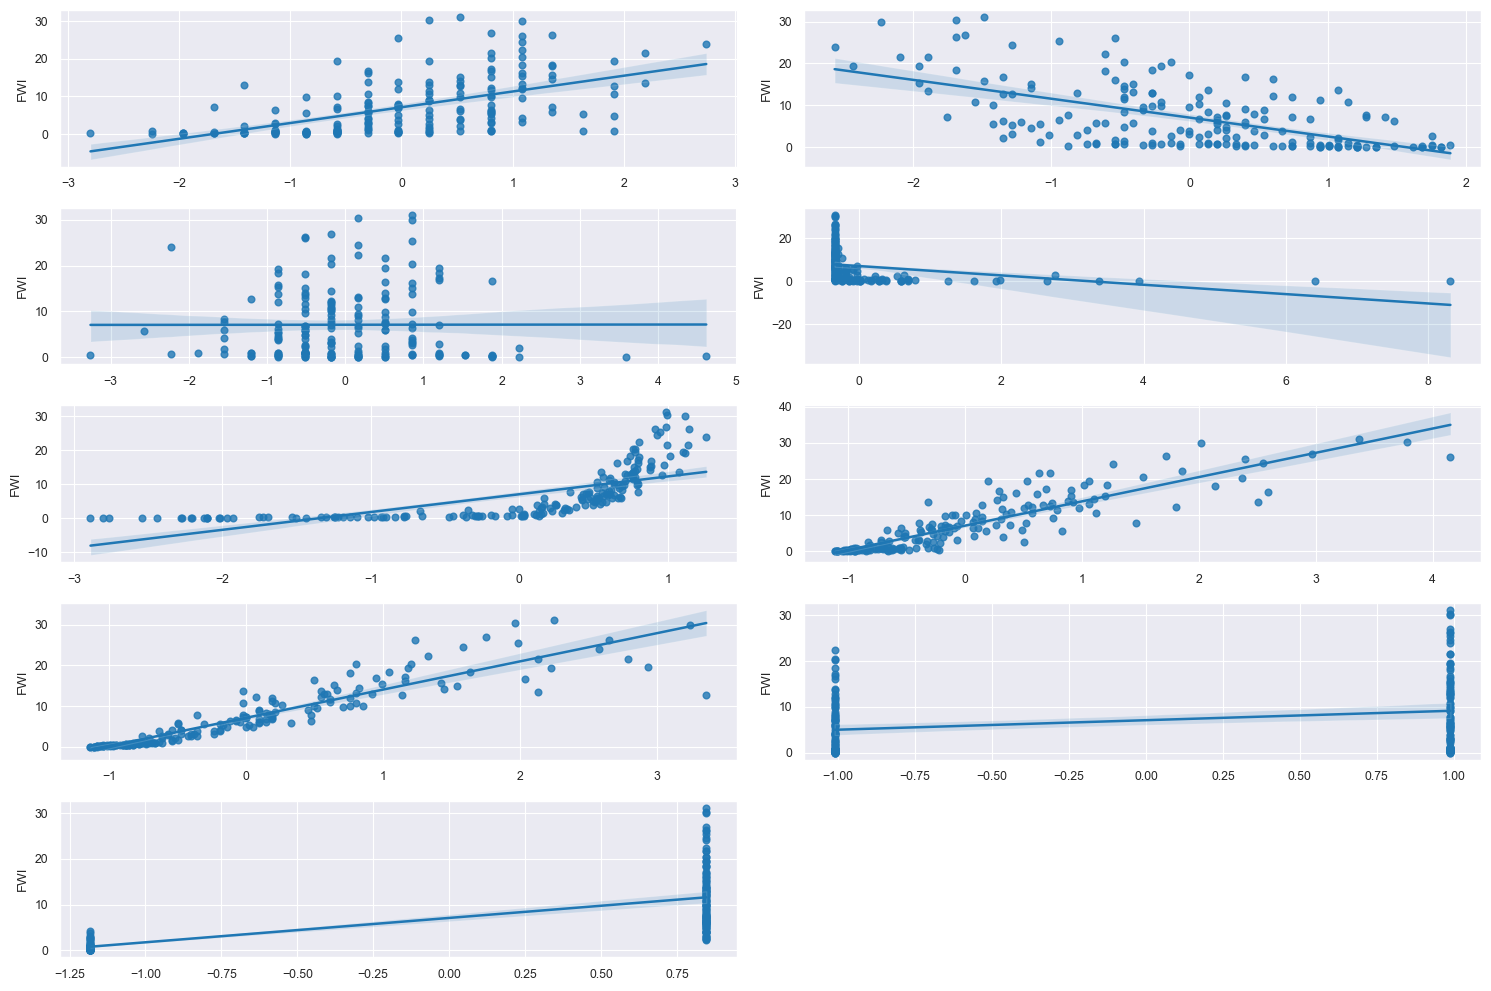

In [387]:
# This code is used to create a scatter plot matrix of the independent variables
# against the dependent variable. This is useful for visualizing the relationships
# between the variables.
#
# The scatter plot matrix is created using the seaborn library and the
# regplot() function. The regplot() function creates a scatter plot with an
# optional regression line. The x parameter is the independent variable, and the
# y parameter is the dependent variable.
#
# The tight_layout() function is used to ensure that the subplots do not overlap
# with each other.
#
# The show() function is used to display the plot.

plt.figure(figsize=(15,10))
# Create a subplot for each independent variable
for i in range(x_train.shape[1]):
    plt.subplot(5,2,i+1)
    # Create a scatter plot of the independent variable against the dependent
    # variable
    sns.regplot(x=x_train[:,i], y=y_train)
    # Ensure that the subplots do not overlap
    plt.tight_layout()
# Display the plot
plt.show()

# Linear Regression Model

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create an instance of the LinearRegression class and fit it to the training data
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

# Print the coefficients of the model
print(regression.coef_)

# Print the intercept of the model
print(regression.intercept_)

# Make predictions on the test data and store them in a variable called y_pred
y_pred = regression.predict(x_test) 

# Print the mean absolute error of the predictions  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Print the mean squared error of the predictions
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

# Print the root mean squared error of the predictions
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print the R2 score of the predictions
print("R2 Score:", metrics.r2_score(y_test, y_pred))



[ 0.04382468 -0.16622146  0.1463395  -0.1402984  -0.86420111  3.74385402
  4.60172257 -0.41298882  0.37129119]
7.0747252747252745
Mean Absolute Error: 0.8588774378617503
Mean Squared Error: 1.5113810125117755
Root Mean Squared Error: 1.2293823703436517
R2 Score: 0.9704205115729373


<Axes: xlabel='FWI'>

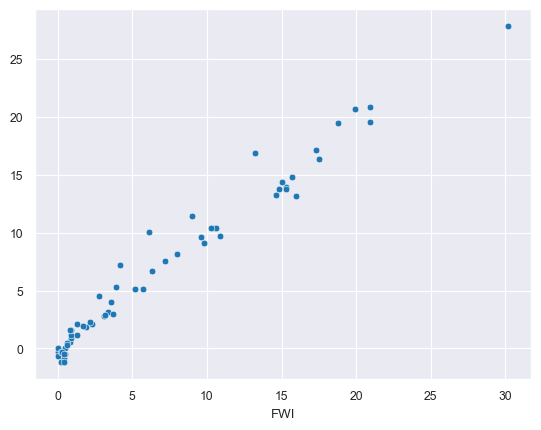

In [389]:
sns.scatterplot(x=y_test, y=y_pred)

# Lasso Regression Model

In [390]:
from sklearn.linear_model import Lasso
from sklearn import metrics

# Create an instance of the LinearRegression class and fit it to the training data
lasso = Lasso()
lasso.fit(x_train, y_train)

# Print the coefficients of the model
print(lasso.coef_)

# Print the intercept of the model
print(lasso.intercept_)

# Make predictions on the test data and store them in a variable called y_pred
y_pred = lasso.predict(x_test) 

# Print the mean absolute error of the predictions  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Print the mean squared error of the predictions
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

# Print the root mean squared error of the predictions
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print the R2 score of the predictions
print("R2 Score:", metrics.r2_score(y_test, y_pred))



[ 0.         -0.          0.         -0.          0.          3.01737542
  3.79496337 -0.          0.        ]
7.0747252747252745
Mean Absolute Error: 1.398089374367748
Mean Squared Error: 3.281294521359323
Root Mean Squared Error: 1.811434382294684
R2 Score: 0.9357812407878346


<Axes: xlabel='FWI'>

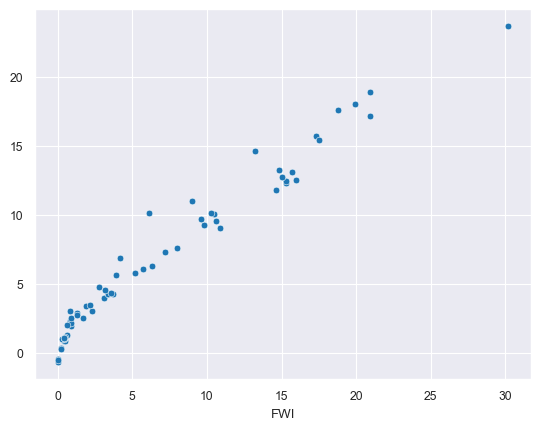

In [391]:
sns.scatterplot(x=y_test, y=y_pred)


# Ridge Regression Model

In [392]:
from sklearn.linear_model import Ridge
from sklearn import metrics

# Create an instance of the LinearRegression class and fit it to the training data
ridge = Ridge()
ridge.fit(x_train, y_train)

# Print the coefficients of the model
print(ridge.coef_)

# Print the intercept of the model
print(ridge.intercept_)

# Make predictions on the test data and store them in a variable called y_pred
y_pred = ridge.predict(x_test) 

# Print the mean absolute error of the predictions  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Print the mean squared error of the predictions
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

# Print the root mean squared error of the predictions
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print the R2 score of the predictions
print("R2 Score:", metrics.r2_score(y_test, y_pred))



[ 0.0484271  -0.18843436  0.16235113 -0.1380712  -0.82225373  3.72817709
  4.52328393 -0.40483189  0.39052869]
7.0747252747252745
Mean Absolute Error: 0.8656129181257128
Mean Squared Error: 1.5320742517229435
Root Mean Squared Error: 1.2377698702597926
R2 Score: 0.970015520756791


<Axes: xlabel='FWI'>

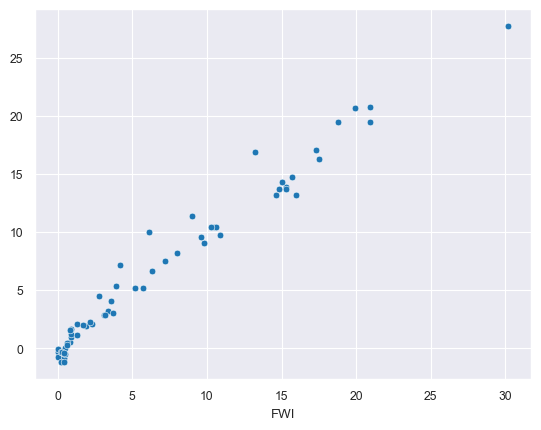

In [393]:
sns.scatterplot(x=y_test, y=y_pred)


# Elastic Regression Model

In [394]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics

# Create an instance of the LinearRegression class and fit it to the training data
elastic = ElasticNet()
elastic.fit(x_train, y_train)

# Print the coefficients of the model
print(elastic.coef_)

# Print the intercept of the model
print(elastic.intercept_)

# Make predictions on the test data and store them in a variable called y_pred
y_pred = elastic.predict(x_test) 

# Print the mean absolute error of the predictions  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Print the mean squared error of the predictions
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

# Print the root mean squared error of the predictions
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print the R2 score of the predictions
print("R2 Score:", metrics.r2_score(y_test, y_pred))



[ 0.15170316 -0.40037394  0.         -0.          0.34368835  2.40350211
  2.38344468  0.          0.7400436 ]
7.0747252747252745
Mean Absolute Error: 1.8810670005005472
Mean Squared Error: 5.829630890369766
Root Mean Squared Error: 2.4144628575254097
R2 Score: 0.8859073271211972


<Axes: xlabel='FWI'>

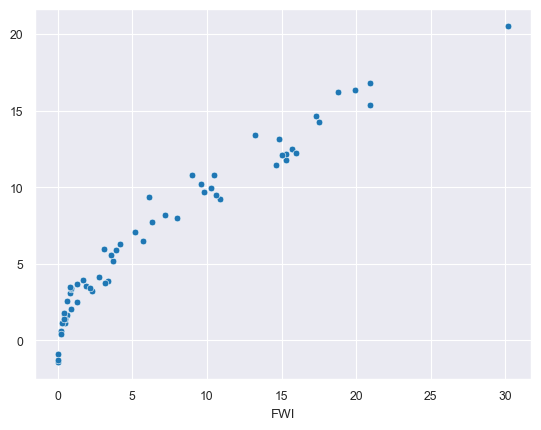

In [395]:
sns.scatterplot(x=y_test, y=y_pred)


In [396]:
regression.predict(std.transform([[27,	77,	16,	0.0,	64.8,	3.0,	1.2,0,0.0	]]))

c:\Users\pandh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.21890117])

In [397]:
df.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,ISI,FWI,CLASSES,REGION
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0.0


In [398]:
import pickle
pickle.dump(std, open('std.pkl','wb'))